In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os

def load_sensor_data(filename):
    df = pd.read_csv(f'../Data/raw_data/{filename}', sep=',')

    # Split the data into columns
    try:
        df[['Cycle','Position','Reading','Speed']] = df['Data'].str.split(':', expand=True)
    except:
        df[['Cycle','Position','Reading']] = df['Data'].str.split(':', expand=True)
    df.drop(columns=['Data','Index'], inplace=True)
    # Clean 
    df.dropna(inplace=True)

    # Convert the data types
    df['Cycle'] = df['Cycle'].astype(int)
    df['Position'] = df['Position'].astype(int)
    df['Reading'] = df['Reading'].astype(float)

    df['Position_Gradient'] = np.gradient(df['Position'])
    df['Direction'] = df['Position_Gradient'] > 0

    # print(df.tail())
    print(f"Data loaded from {filename}")

    return df

# def plot_pr_curve(df, bounds, col=None):
#     if col is None:
#         col = 'Reading'
#     df_plot = df[(df['Cycle'] >= bounds[0]) & (df['Cycle'] <= bounds[1])]
def plot_pr_curve(df, bounds, col=None):
    if col is None:
        col = 'Reading'
    df_plot = df[(df['Cycle'] >= bounds[0]) & (df['Cycle'] <= bounds[1])]
    for cycle in df_plot['Cycle'].unique():
        df_cycle = df_plot[df_plot['Cycle'] == cycle]
        plt.plot(df_cycle['Position'], df_cycle[col], label=f'Cycle {cycle}', color=plt.cm.gist_rainbow(cycle / df_plot['Cycle'].nunique()))
        
    plt.title(f'Position vs {col}, {bounds} Cycles [Color: Cycle]')
    plt.xlabel('Position')
    plt.ylabel('Resistance (ADC Value)')
 

def plot_pr_scatter(df, bounds, col=None):
    if col is None:
        col = 'Reading'
    df_plot = df[(df['Cycle'] >= bounds[0]) & (df['Cycle'] <= bounds[1])]
    plt.scatter(df_plot['Position'], df_plot[col], c=df_plot['Cycle'], cmap='gist_rainbow',s=5)
    plt.title(f'Position vs {col}, {bounds} Cycles [Color: Cycle]')
    plt.xlabel('Position')
    plt.ylabel('Resistance (ADC Value)')
    plt.colorbar()

def plot_data(df, bounds, col=None):
    if col is None:
        col = 'Reading'
    df_plot = df[(df['Cycle'] >= bounds[0]) & (df['Cycle'] <= bounds[1])]
    df_plot2 = df_plot[(df_plot['Position'] == -400) | (df_plot['Position'] == 0)]
    plt.plot(df_plot.index, df_plot[col])
    plt.scatter(df_plot2.index, df_plot2[col], c=df_plot2['Position'], cmap='viridis',s=5)
    plt.title('Raw Data, 100 Cycles')
    plt.xlabel('Index')
    plt.ylabel('Resistance (ADC Value)')
    # plt.show()

print("Ready")

Ready


In [11]:
df = None
df_split = None
df_plot = None

file_name = 'data_filmed_0204_220747.csv'

# List files in the directory
files = os.listdir('../Data/raw_data')
# List files in the directory sorted by creation date
files = sorted(os.listdir('../Data/raw_data'), key=lambda x: os.path.getctime(os.path.join('../Data/raw_data', x)))

# Create a dropdown widget
file_dropdown = widgets.Dropdown(
    options=files,
    description='Select File:',
    disabled=False,
)

# Display the dropdown widget
display(file_dropdown)

df = load_sensor_data(files[-1])

# Update the file_name based on the selection
def on_file_change(change):
    global file_name, df
    file_name = change['new']

    df = load_sensor_data(file_name)

file_dropdown.observe(on_file_change, names='value')

Dropdown(description='Select File:', options=('formatted_data_0123_224049.csv', 'formatted_data_0123_224103.cs…

Data loaded from data_notoast_randpos_0301_162413.csv


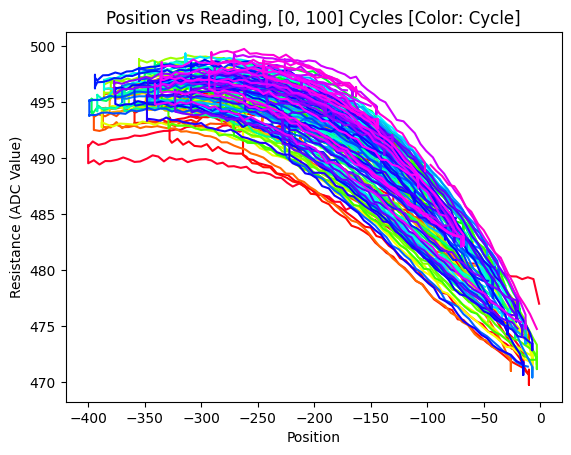

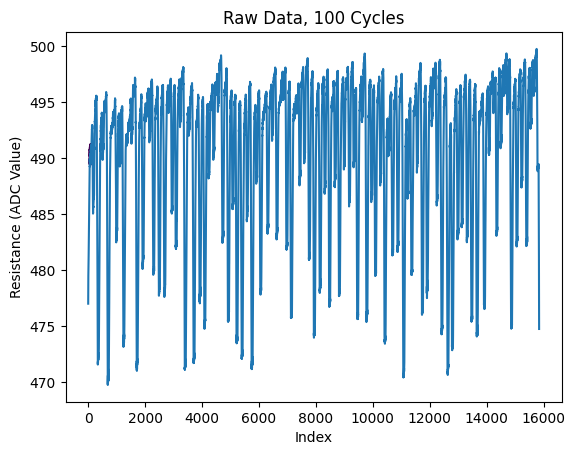

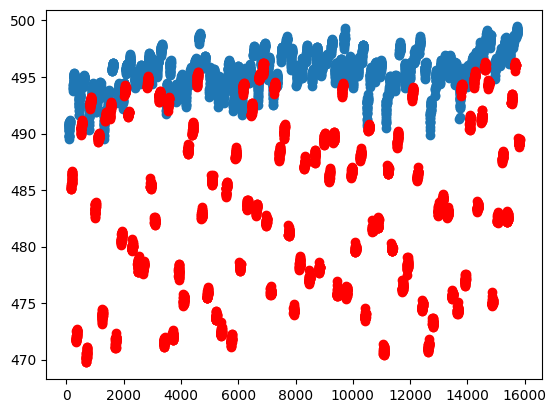

In [22]:
plot_pr_curve(df,[0,100])
plt.show()
plot_data(df,[0,100])
plt.show()
# peaks = df[(df['Position'] == -400) & (df['Position'].shift(1) != -400)]
# valleys = df[(df['Position'] == 0) & (df['Position'].shift(1) != 0)]
points = df[df['Position'] == df['Position'].shift(-1)]
peaks = points[points['Position'] < -200] 
valleys = points[points['Position'] > -200]


plt.scatter(peaks.index,peaks['Reading'])
plt.scatter(valleys.index,valleys['Reading'],c='r')

[8.97258738e-01 1.20668793e+03 4.81412619e+02]


c:\Users\camca\WormMQP\.venv\Lib\site-packages\pandas\core\indexes\base.py:945: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


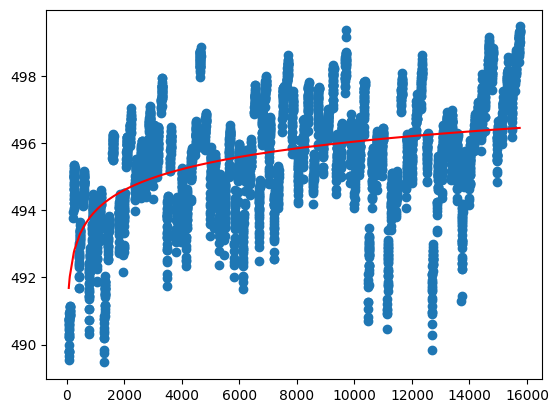

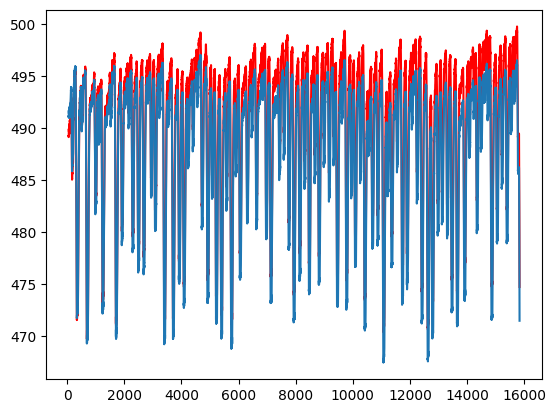

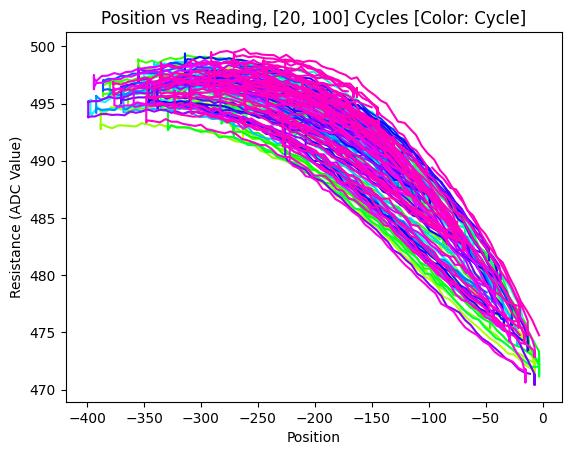

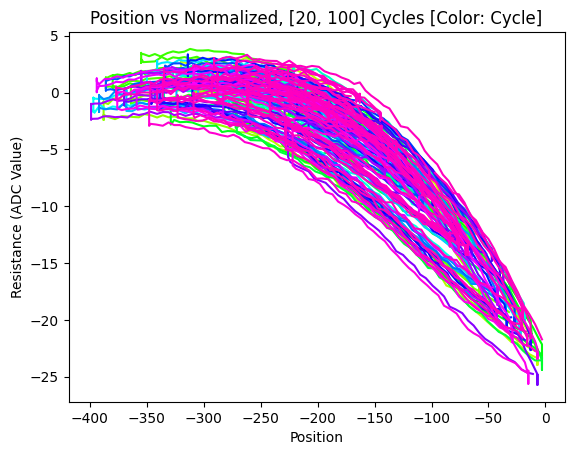

In [18]:
import scipy.optimize


data_set = peaks

def func(x, a, b, c):
    return a * np.log(b * x) + c

popt, pcov = scipy.optimize.curve_fit(func, data_set.index[10:], data_set['Reading'][10:])
print(popt)

plt.scatter(data_set.index,data_set['Reading'])
plt.plot(data_set.index, func(data_set.index, *popt),c='r')
plt.show()

def predict(x):
    return func(x, *popt)

df['Normalized'] = df['Reading'] - predict(df.index)
start = 50
plt.plot(df[start:].index,df['Reading'][start:], c='r')
plt.plot(df[start:].index, df['Normalized'][start:]+df['Reading'].median())
plt.show()

plot_pr_curve(df,[20,100])
plt.show()
plot_pr_curve(df,[20,100],'Normalized')

plt.show()
# plt.scatter(df['Position'][4600:],df['Normalized'][4600:])



C:\Users\camca\AppData\Local\Temp\ipykernel_2256\4227659513.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df[4600:][(df['Position'] != 0) & (df['Position'] != -400)]


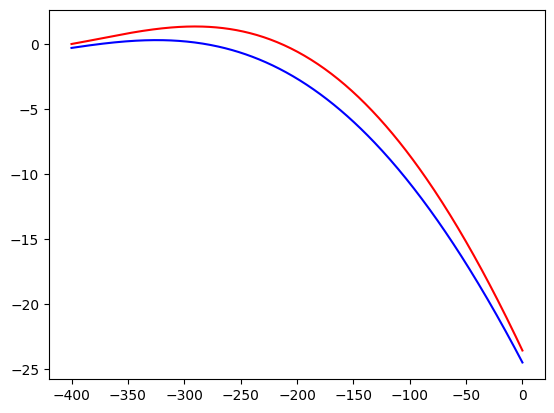

C:\Users\camca\AppData\Local\Temp\ipykernel_2256\4227659513.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_test['Clean'] = eval_test.apply(lambda row: row['Eval'][0], axis =1)
C:\Users\camca\AppData\Local\Temp\ipykernel_2256\4227659513.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_test['Predicted'] = eval_test['Clean']


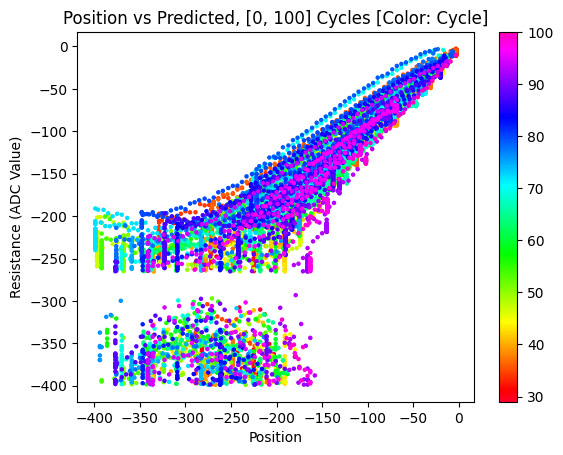

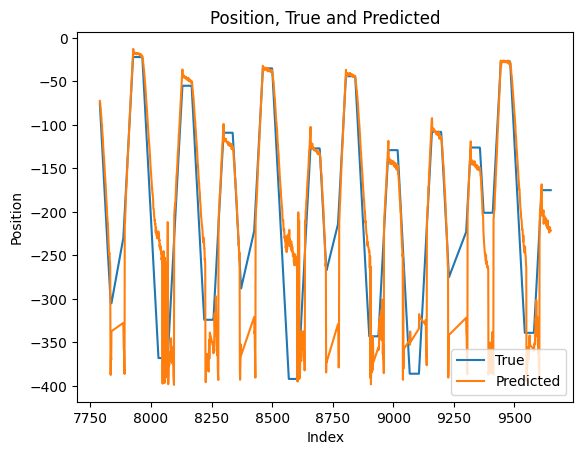

In [19]:
class SensorModel():
    def __init__(self, data):
        # self.pos_model = None
        # self.neg_model = None

        self.raw_data = data
        self.min_pos = self.raw_data['Position'].min()
        self.max_pos = self.raw_data['Position'].max()
        # Separate function for later migration to live updating model
        self.splitData()
        self.model()
        pass

    def splitData(self):
        df = self.raw_data
        self.x_positive = df['Position'][df['Direction']]
        self.y_positive = df['Normalized'][df['Direction']]

        self.x_negative = df['Position'][~df['Direction']]
        self.y_negative = df['Normalized'][~df['Direction']]

    def model(self):
        self.pos_model = np.poly1d(np.polyfit(self.x_positive, self.y_positive, 4))
        self.neg_model = np.poly1d(np.polyfit(self.x_negative, self.y_negative, 4))
    
    def get_solution(self, model, y_value):
        x_value = (model - y_value).roots
        # lame and bloated one liner
        real_roots = [float(root.real) for root in x_value if root.imag == 0 and root.real >= self.min_pos and root.real <= self.max_pos]
        if len(real_roots) == 0:
            return None
        return real_roots

    def eval(self, val, dir):
        if dir:
            roots = self.get_solution(self.pos_model, val)
        else:
            roots = self.get_solution(self.neg_model, val)
        # return min(abs(roots - ))
        return roots
    
    def plot(self):
        pos = np.linspace(-400, 0, 400)
        # p = np.ones(400)
        # n = np.zeros(400)
        plt.plot(pos, self.pos_model(pos),c='r')
        plt.plot(pos, self.neg_model(pos), c='b')
        plt.show()


df_model = df[4600:][(df['Position'] != 0) & (df['Position'] != -400)]

model = SensorModel(df_model)
model.plot()

df_model['Eval'] = df_model.apply(lambda row: model.eval(row['Normalized'], row['Direction']), axis=1)

eval_test = df_model.dropna(inplace=False)
eval_test['Clean'] = eval_test.apply(lambda row: row['Eval'][0], axis =1)

# plt.plot(eval_test.index,eval_test['Clean'])
plt.show()
eval_test['Predicted'] = eval_test['Clean']
plot_pr_scatter(eval_test,[0,100],'Predicted')
plt.show()

# plot_data(eval_test,[60,70],'Position')
# plot_data(eval_test,[60,70],'Clean')
eval_test = eval_test[(eval_test['Cycle'] >= 50) & (eval_test['Cycle'] <= 60)]
plt.plot(eval_test.index, eval_test['Position'], label='True')
plt.plot(eval_test.index, eval_test['Clean'], label='Predicted')
plt.title('Position, True and Predicted')
plt.xlabel('Index')
plt.ylabel('Position')
plt.legend()
plt.show()


# df_model['Eval'][df_model['Eval'] == None] = [0]
# df_model['Clean'] = df_model.apply(lambda row: row['Eval'][0] if row['Eval'] is not None else 0)
# plt.plot(df_model.index,df_model['Eval'])

# print(model.eval(500,1))





In [20]:
mse = np.mean(np.square(eval_test['Position'] - eval_test['Clean']))
print(mse)
rmse = np.sqrt(mse)
print(rmse)

3252.9181429118194
57.034359318851116


Data loaded from data_toast3_0219_190827.csv
Data loaded from data_toast3_rerun_0219_193528.csv
Data loaded from data_toast3_rererun_0220_161709.csv


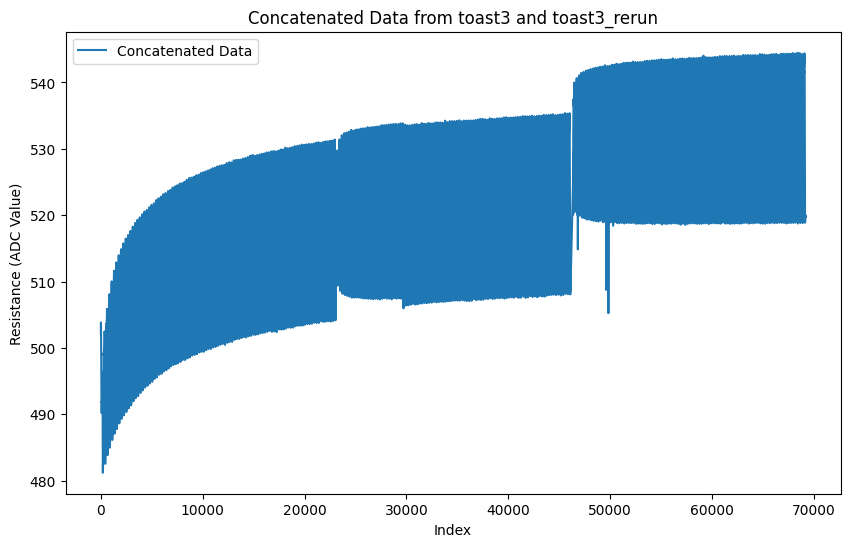

In [9]:
# Load the data for both files
df_toast3 = load_sensor_data('data_toast3_0219_190827.csv')
df_toast3_rerun = load_sensor_data('data_toast3_rerun_0219_193528.csv')
df_toast3_rererun = load_sensor_data('data_toast3_rererun_0220_161709.csv')

# Offset the index of the second dataframe
df_toast3_rerun.reset_index(drop=True, inplace=True)
df_toast3_rerun.index += len(df_toast3)

df_toast3_rererun.reset_index(drop=True,inplace=True)
df_toast3_rererun.index += len(df_toast3) + len(df_toast3_rerun)

# Concatenate the dataframes
df_concat = pd.concat([df_toast3, df_toast3_rerun, df_toast3_rererun[200:]])

# Plot the concatenated data
plt.figure(figsize=(10, 6))
plt.plot(df_concat.index, df_concat['Reading'], label='Concatenated Data')
plt.title('Concatenated Data from toast3 and toast3_rerun')
plt.xlabel('Index')
plt.ylabel('Resistance (ADC Value)')
plt.legend()
plt.show()

[   5.93734051 4586.23968296  377.92892767]
[  5.25531139 201.3600519  405.55832465]
[  6.34646233 166.71161573 392.15082207]
[  6.88596822 424.63938411 378.13080383]
[  5.18252988 151.99948007 409.32699723]
[  6.08162097 464.86406659 389.70222032]
[  5.55056762 727.47188966 395.55303809]
[  4.74935592 169.11440576 415.59022143]
[  5.71794545  63.58171216 406.65574845]
[  3.83268958 239.76442874 428.17455387]


c:\Users\camca\WormMQP\.venv\Lib\site-packages\pandas\core\indexes\base.py:945: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


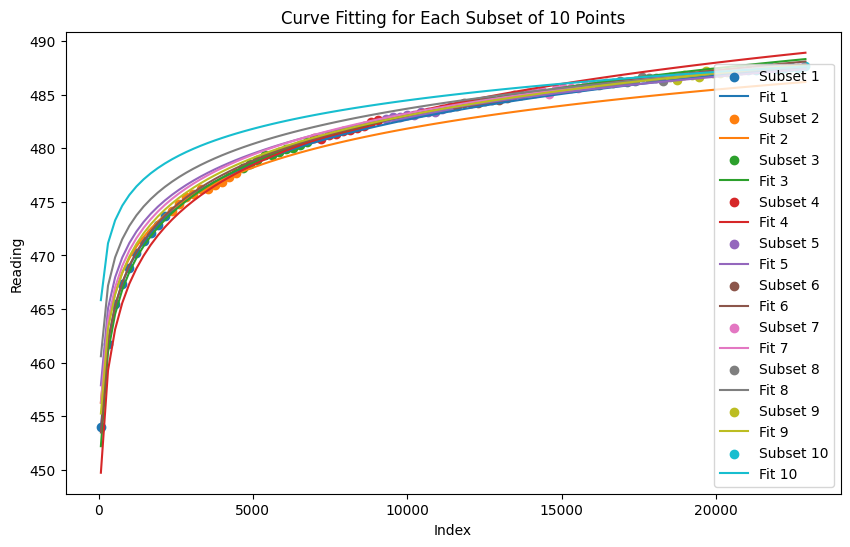

In [10]:
# Define the function to fit
def func(x, a, b, c):
    return a * np.log(b * x) + c

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop through the peaks dataframe in subsets of 10 points
for i in range(0, len(peaks), 10):
    subset = peaks.iloc[i:i+10]
    if len(subset) < 10:
        break
    x_data = subset.index
    y_data = subset['Reading']
    
    # Fit the curve
    popt, _ = scipy.optimize.curve_fit(func, x_data, y_data)
    
    # Plot the original data points
    plt.scatter(x_data, y_data, label=f'Subset {i//10 + 1}')
    
    # Plot the fitted curve
    plt.plot(peaks.index, func(peaks.index, *popt), label=f'Fit {i//10 + 1}')
    print(popt)

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Reading')
plt.title('Curve Fitting for Each Subset of 10 Points')
plt.legend()
plt.show()